<a href="https://colab.research.google.com/github/SahilLokhande2604/Crop_Yield_Prediction/blob/main/Random_Forest_Model_Crop_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from google.colab import drive

df = pd.read_csv("/content/crop_yield.csv")
print(df.shape)
print(df["Crop"].unique())
print((df["Crop"].unique()).size)
X = df[['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]
y = df['Yield']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define numeric and categorical feature groups
numeric_features = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
categorical_features = ['Season', 'Crop', 'State']
# Preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


(19689, 10)
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']
55


In [ ]:
# Fit the model to the training data
model_rf.fit(X_train, y_train)
# Predict using the test data
y_pred_rf = model_rf.predict(X_test)
# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared Score: {r2_rf}")
sample_df = pd.DataFrame([X_test.iloc[0]])
sample = X_test.iloc[0].to_dict()
print(f"\nSample input: {sample}")
prediction = model_rf.predict(sample_df)
print(f"Predicted yield: {prediction[0]:.2f}")
print(f"Actual yield: {y_test.iloc[0]:.2f}")
# Predict for multiple samples
n_samples = 5
samples = X_test.iloc[:n_samples]
predictions = model_rf.predict(samples)

for i in range(n_samples):
    print(f"\nSample {i+1}:")
    print(f"Input: {samples.iloc[i].to_dict()}")
    print(f"Predicted yield: {predictions[i]:.2f}")
    print(f"Actual yield: {y_test.iloc[i]:.2f}")
    print(f"Absolute error: {abs(predictions[i] - y_test.iloc[i]):.2f}")


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
std_dev = np.std(y_pred_rf - y_test)
r2 = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Standard Deviation of Errors: {std_dev}")
print(f"R-squared Score: {r2}")

Random Forest Mean Squared Error: 9896.394438910771
Random Forest R-squared Score: 0.987648649458992

Sample input: {'Crop': 'Peas & beans (Pulses)', 'Crop_Year': 2016, 'Season': 'Kharif     ', 'State': 'Jammu and Kashmir', 'Area': 210.0, 'Production': 1010, 'Annual_Rainfall': 902.8, 'Fertilizer': 32182.5, 'Pesticide': 73.5}
Predicted yield: 3.67
Actual yield: 3.82

Sample 1:
Input: {'Crop': 'Peas & beans (Pulses)', 'Crop_Year': 2016, 'Season': 'Kharif     ', 'State': 'Jammu and Kashmir', 'Area': 210.0, 'Production': 1010, 'Annual_Rainfall': 902.8, 'Fertilizer': 32182.5, 'Pesticide': 73.5}
Predicted yield: 3.67
Actual yield: 3.82
Absolute error: 0.15

Sample 2:
Input: {'Crop': 'Maize', 'Crop_Year': 1999, 'Season': 'Rabi       ', 'State': 'Odisha', 'Area': 8270.0, 'Production': 10280, 'Annual_Rainfall': 1484.3, 'Fertilizer': 877695.1, 'Pesticide': 2232.9}
Predicted yield: 1.41
Actual yield: 1.40
Absolute error: 0.01

Sample 3:
Input: {'Crop': 'Potato', 'Crop_Year': 2016, 'Season': 'Wint

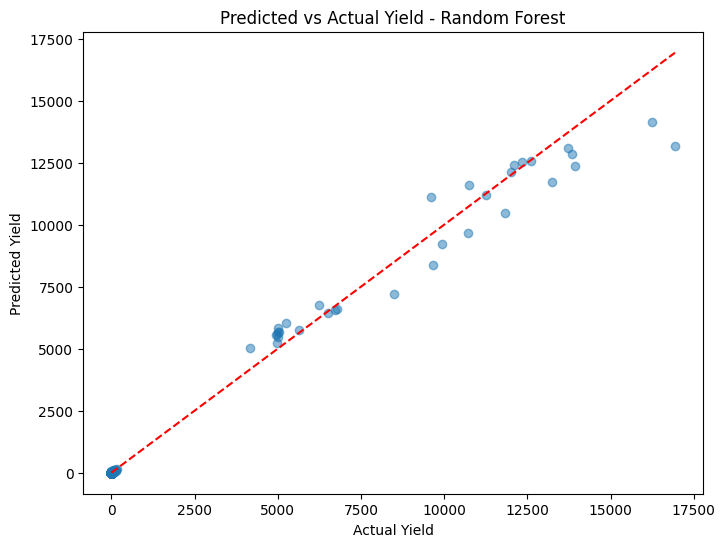

In [ ]:
# 1. Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Predicted vs Actual Yield - Random Forest')
plt.show()

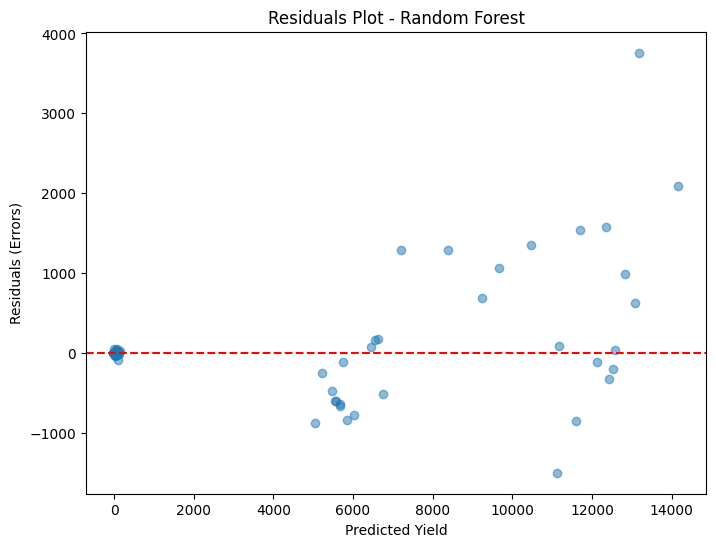

In [ ]:
# 2. Residuals Plot
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals Plot - Random Forest')
plt.show()

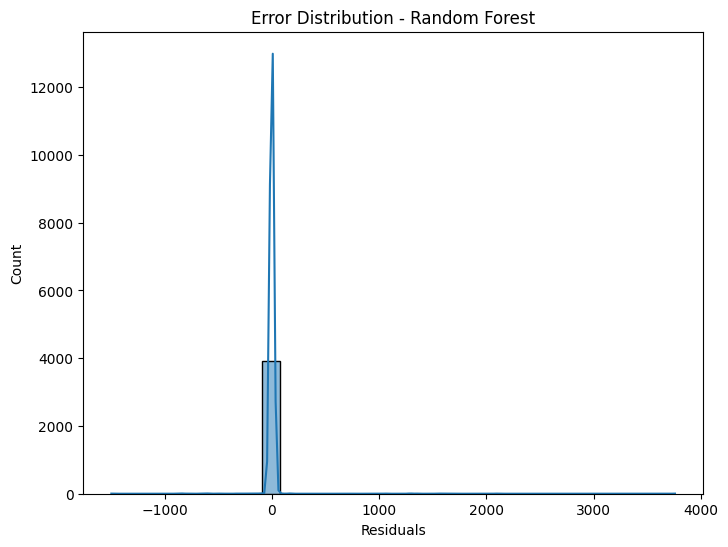

In [ ]:
# 3. Error Distribution (Histogram of residuals)
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Error Distribution - Random Forest')
plt.show()

# Paired t-Test

In [ ]:
from scipy.stats import ttest_rel

# Baseline prediction (mean of training target)
baseline_pred = np.mean(y_train)
residuals_model = y_test - y_pred_rf
residuals_baseline = y_test - baseline_pred

In [ ]:
absolute_errors_model = np.abs(y_test - y_pred_rf)
absolute_errors_baseline = np.abs(y_test - baseline_pred)

t_stat_abs, p_value_abs = ttest_rel(absolute_errors_model, absolute_errors_baseline)

print("Paired t-test (Absolute Errors) results:")
print(f"T-statistic: {t_stat_abs:.4f}")
print(f"P-value: {p_value_abs:.4f}")

if p_value_abs < 0.05:
    print("Reject the null hypothesis: The model's absolute errors are significantly smaller than the baseline.")
else:
    print("Fail to reject the null hypothesis: No significant difference in absolute errors between the model and baseline.")


Paired t-test (Absolute Errors) results:
T-statistic: -11.1374
P-value: 0.0000
Reject the null hypothesis: The model's absolute errors are significantly smaller than the baseline.


# Residual Normality Test
Test whether the residuals (errors) are normally distributed, a common assumption for regression models.

In [ ]:
from scipy.stats import shapiro

# Calculate residuals
residuals = y_test - y_pred_rf

# Perform Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = shapiro(residuals)

print("\nShapiro-Wilk Test Results for Residuals")
print(f"Shapiro-Wilk statistic: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_p_value:.4f}")
if shapiro_p_value < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")



Shapiro-Wilk Test Results for Residuals
Shapiro-Wilk statistic: 0.0503
p-value: 0.0000
Reject the null hypothesis: Residuals are not normally distributed.


# Wilcoxon Signed-Rank Test

In [ ]:
from scipy.stats import wilcoxon

# Use absolute or squared errors
stat, p_value_wilcoxon = wilcoxon(absolute_errors_model - absolute_errors_baseline)

print("Wilcoxon Signed-Rank Test results:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value_wilcoxon:.4f}")

if p_value_wilcoxon < 0.05:
    print("Reject the null hypothesis: The model's errors are significantly smaller than the baseline.")
else:
    print("Fail to reject the null hypothesis: No significant difference in errors between the model and baseline.")


Wilcoxon Signed-Rank Test results:
Statistic: 501.0000
P-value: 0.0000
Reject the null hypothesis: The model's errors are significantly smaller than the baseline.


# Chi-Square Goodness-of-Fit Test

In [ ]:
from scipy.stats import chisquare

# Bin residuals for chi-square test
residuals_bins = np.histogram(residuals, bins='auto')[0]

# Perform chi-square test
chi_stat, chi_p_value = chisquare(residuals_bins)

print("\nChi-Square Goodness-of-Fit Test Results")
print(f"Chi-Square statistic: {chi_stat:.4f}")
print(f"p-value: {chi_p_value:.4f}")
if chi_p_value < 0.05:
    print("Reject the null hypothesis: Residuals do not fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis: Residuals fit the expected distribution.")



Chi-Square Goodness-of-Fit Test Results
Chi-Square statistic: 39547626.7897
p-value: 0.0000
Reject the null hypothesis: Residuals do not fit the expected distribution.


# R2

In [ ]:
from scipy.stats import f

# Number of samples and features
n_samples = X_test.shape[0]
n_features = len(numeric_features) + len(preprocessor.transformers_[1][1].get_feature_names_out())

# F-statistic for R-squared
f_stat = (r2_rf / (1 - r2_rf)) * ((n_samples - n_features - 1) / n_features)
p_value_r2 = 1 - f.cdf(f_stat, dfn=n_features, dfd=n_samples - n_features - 1)

print("R-squared hypothesis testing results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_r2:.4f}")

if p_value_r2 < 0.05:
    print("Reject the null hypothesis: The model explains a significant amount of variance.")
else:
    print("Fail to reject the null hypothesis: The model does not explain a significant amount of variance.")


R-squared hypothesis testing results:
F-statistic: 3165.5379
P-value: 0.0000
Reject the null hypothesis: The model explains a significant amount of variance.


# Weighted Error

In [ ]:
squared_errors_model = (y_test - y_pred_rf) ** 2
squared_errors_baseline = (y_test - baseline_pred) ** 2

t_stat_sq, p_value_sq = ttest_rel(squared_errors_model, squared_errors_baseline)

print("Paired t-test (Squared Errors) results:")
print(f"T-statistic: {t_stat_sq:.4f}")
print(f"P-value: {p_value_sq:.4f}")

if p_value_sq < 0.05:
    print("Reject the null hypothesis: The model's squared errors are significantly smaller than the baseline.")
else:
    print("Fail to reject the null hypothesis: No significant difference in squared errors between the model and baseline.")


Paired t-test (Squared Errors) results:
T-statistic: -4.5827
P-value: 0.0000
Reject the null hypothesis: The model's squared errors are significantly smaller than the baseline.


# Bootstraping

In [ ]:
np.random.seed(42)
differences = absolute_errors_model - absolute_errors_baseline
bootstrapped_means = [np.mean(np.random.choice(differences, size=len(differences), replace=True)) for _ in range(1000)]

ci_lower = np.percentile(bootstrapped_means, 2.5)
ci_upper = np.percentile(bootstrapped_means, 97.5)

print(f"Bootstrapped CI for mean difference in absolute errors: [{ci_lower:.4f}, {ci_upper:.4f}]")

if ci_lower > 0 or ci_upper < 0:
    print("Reject the null hypothesis: Model's errors are significantly different from the baseline.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


Bootstrapped CI for mean difference in absolute errors: [-167.5094, -118.8086]
Reject the null hypothesis: Model's errors are significantly different from the baseline.


Paired t-Test (Absolute Errors):
T-statistic: -11.1374, P-value: 0.0000
Reject the null hypothesis: Model's absolute errors are significantly smaller.

Paired t-Test (Squared Errors):
T-statistic: -4.5827, P-value: 0.0000
Reject the null hypothesis: Model's squared errors are significantly smaller.

Wilcoxon Signed-Rank Test:
Statistic: 501.0000, P-value: 0.0000
Reject the null hypothesis: Model's errors are significantly smaller.

Bootstrapped Confidence Interval for Mean Difference in Absolute Errors:
95% CI: [-167.5094, -118.8086]
Reject the null hypothesis: Model's errors are significantly different.


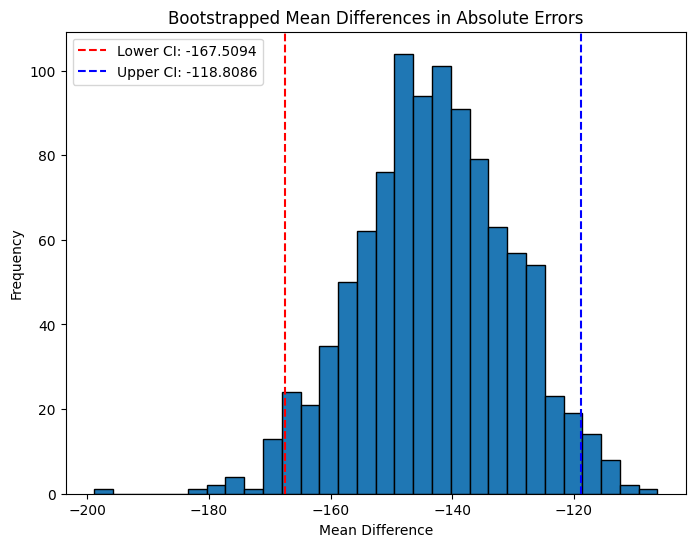

In [ ]:
import numpy as np
from scipy.stats import ttest_rel, wilcoxon
import matplotlib.pyplot as plt

# Baseline prediction: Mean of training labels
baseline_pred = np.mean(y_train)

# Calculate errors
absolute_errors_model = np.abs(y_test - y_pred_rf)
absolute_errors_baseline = np.abs(y_test - baseline_pred)

squared_errors_model = (y_test - y_pred_rf) ** 2
squared_errors_baseline = (y_test - baseline_pred) ** 2

# Paired t-Test on Absolute Errors
t_stat_abs, p_value_abs = ttest_rel(absolute_errors_model, absolute_errors_baseline)
print("Paired t-Test (Absolute Errors):")
print(f"T-statistic: {t_stat_abs:.4f}, P-value: {p_value_abs:.4f}")
if p_value_abs < 0.05:
    print("Reject the null hypothesis: Model's absolute errors are significantly smaller.")
else:
    print("Fail to reject the null hypothesis: No significant difference in absolute errors.")

# Paired t-Test on Squared Errors
t_stat_sq, p_value_sq = ttest_rel(squared_errors_model, squared_errors_baseline)
print("\nPaired t-Test (Squared Errors):")
print(f"T-statistic: {t_stat_sq:.4f}, P-value: {p_value_sq:.4f}")
if p_value_sq < 0.05:
    print("Reject the null hypothesis: Model's squared errors are significantly smaller.")
else:
    print("Fail to reject the null hypothesis: No significant difference in squared errors.")

# Wilcoxon Signed-Rank Test
stat, p_value_wilcoxon = wilcoxon(absolute_errors_model - absolute_errors_baseline)
print("\nWilcoxon Signed-Rank Test:")
print(f"Statistic: {stat:.4f}, P-value: {p_value_wilcoxon:.4f}")
if p_value_wilcoxon < 0.05:
    print("Reject the null hypothesis: Model's errors are significantly smaller.")
else:
    print("Fail to reject the null hypothesis: No significant difference in errors.")

# Bootstrapping Confidence Interval
np.random.seed(42)
differences = absolute_errors_model - absolute_errors_baseline
bootstrapped_means = [
    np.mean(np.random.choice(differences, size=len(differences), replace=True))
    for _ in range(1000)
]
ci_lower = np.percentile(bootstrapped_means, 2.5)
ci_upper = np.percentile(bootstrapped_means, 97.5)

print("\nBootstrapped Confidence Interval for Mean Difference in Absolute Errors:")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
if ci_lower > 0 or ci_upper < 0:
    print("Reject the null hypothesis: Model's errors are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in errors.")

# Visualization of Bootstrapping
plt.figure(figsize=(8, 6))
plt.hist(bootstrapped_means, bins=30, edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower CI: {ci_lower:.4f}')
plt.axvline(ci_upper, color='blue', linestyle='--', label=f'Upper CI: {ci_upper:.4f}')
plt.title('Bootstrapped Mean Differences in Absolute Errors')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

# Pearson Correlation Coefficient
pearson_corr, pearson_p = pearsonr(y_test, y_pred_rf)
print("Pearson Correlation Coefficient:")
print(f"Correlation: {pearson_corr:.4f}, P-value: {pearson_p:.4f}")
if pearson_p < 0.05:
    print("Reject the null hypothesis: Strong linear relationship between actual and predicted.")
else:
    print("Fail to reject the null hypothesis: Weak linear relationship.")

# Spearman Correlation Coefficient
spearman_corr, spearman_p = spearmanr(y_test, y_pred_rf)
print("\nSpearman Correlation Coefficient:")
print(f"Correlation: {spearman_corr:.4f}, P-value: {spearman_p:.4f}")
if spearman_p < 0.05:
    print("Reject the null hypothesis: Strong monotonic relationship between actual and predicted.")
else:
    print("Fail to reject the null hypothesis: Weak monotonic relationship.")




from statsmodels.stats.stattools import durbin_watson
from scipy.stats import ks_2samp, norm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print("\nDurbin-Watson Test:")
print(f"Statistic: {dw_stat:.4f}")
if 1.5 < dw_stat < 2.5:
    print("Residuals have no significant autocorrelation.")
else:
    print("Residuals exhibit significant autocorrelation.")

# Kolmogorov-Smirnov Test for Normality of Residuals
ks_stat, ks_pvalue = ks_2samp(residuals, norm.rvs(size=len(residuals)))
print("\nKolmogorov-Smirnov Test:")
print(f"Statistic: {ks_stat:.4f}, P-value: {ks_pvalue:.4f}")
if ks_pvalue < 0.05:
    print("Reject the null hypothesis: Residuals do not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: Residuals follow a normal distribution.")

# Cross-Validation Scores (Mean Absolute Error as evaluation metric)
cv_scores = cross_val_score(
    model_rf, X, y, cv=5, scoring=make_scorer(mean_absolute_error)
)
print("\nCross-Validation (Mean Absolute Error) Scores:")
print(cv_scores)
print(f"Mean MAE: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

# Relative Absolute Error (RAE)
mean_actual = np.mean(y_test)
rae = np.sum(np.abs(y_test - y_pred_rf)) / np.sum(np.abs(y_test - mean_actual))
print("\nRelative Absolute Error (RAE):")
print(f"RAE: {rae:.4f}")

# Theil’s U Statistic
numerator = np.sqrt(np.mean((y_pred_rf - y_test) ** 2))
denominator = np.sqrt(np.mean(y_test ** 2)) + np.sqrt(np.mean(y_pred_rf ** 2))
theils_u = numerator / denominator
print("\nTheil’s U Statistic:")
print(f"Theil’s U: {theils_u:.4f}")
if theils_u < 1:
    print("Model outperforms the naive baseline.")
else:
    print("Baseline outperforms the model.")


Pearson Correlation Coefficient:
Correlation: 0.9946, P-value: 0.0000
Reject the null hypothesis: Strong linear relationship between actual and predicted.

Spearman Correlation Coefficient:
Correlation: 0.9646, P-value: 0.0000
Reject the null hypothesis: Strong monotonic relationship between actual and predicted.

Durbin-Watson Test:
Statistic: 2.0214
Residuals have no significant autocorrelation.

Kolmogorov-Smirnov Test:
Statistic: 0.2836, P-value: 0.0000
Reject the null hypothesis: Residuals do not follow a normal distribution.

Cross-Validation (Mean Absolute Error) Scores:
[30.86157875 14.96799489  0.91893063 10.3407594   3.97855257]
Mean MAE: 12.2136, Std Dev: 10.5283

Relative Absolute Error (RAE):
RAE: 0.0485

Theil’s U Statistic:
Theil’s U: 0.0566
Model outperforms the naive baseline.
